In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.linear_model import perceptron
from sklearn.model_selection import train_test_split

In [2]:
### Create dataset for Decision Tree in the format given in the printout

CUBE_SIZE = 30
data = defaultdict(list)

for i in range(CUBE_SIZE):
    for j in range(CUBE_SIZE):
        if j > CUBE_SIZE - i - 1:
            if np.random.randint(0,2) == 1: # 50% chance
                data[0].append([i, j + CUBE_SIZE]) 
                print('-', end=' ')
            else:
                continue
        else:
            print('+', end=' ')
            data[1].append([i, j]) 
    print('\n')
        

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + + 

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + - 

+ + + + + + + + + + + + + + + + + + + + + + + + + + + + - - 

+ + + + + + + + + + + + + + + + + + + + + + + + + + + - - - 

+ + + + + + + + + + + + + + + + + + + + + + + + + + - - - 

+ + + + + + + + + + + + + + + + + + + + + + + + + - - 

+ + + + + + + + + + + + + + + + + + + + + + + + - - - 

+ + + + + + + + + + + + + + + + + + + + + + + - - 

+ + + + + + + + + + + + + + + + + + + + + + - 

+ + + + + + + + + + + + + + + + + + + + + - - - - - 

+ + + + + + + + + + + + + + + + + + + + - - - - 

+ + + + + + + + + + + + + + + + + + + - - - - 

+ + + + + + + + + + + + + + + + + + - - - - - - 

+ + + + + + + + + + + + + + + + + - - - - - 

+ + + + + + + + + + + + + + + + - - - - - - 

+ + + + + + + + + + + + + + + - - - - - - - - - 

+ + + + + + + + + + + + + + - - - - - - - - - - 

+ + + + + + + + + + + + + - - - - - - - - - - 

+ + + + + + + + + + + + - - - - - - - 

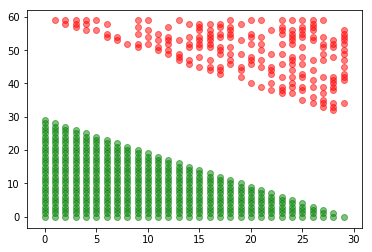

In [3]:
plt.scatter([i for i, j in data[0]], [j for i, j in data[0]], c='r', alpha=0.5)
plt.scatter([i for i, j in data[1]], [j for i, j in data[1]], c='g', alpha=0.5)
plt.show()


In [19]:
print(np.min(data[0], axis =0))
print(np.max(data[0], axis =0))
print(np.min(data[1], axis =0))
print(np.max(data[1], axis =0))

[ 1 32]
[29 59]
[0 0]
[29 29]


In [21]:
### Prepare train/test datasets

X = data[0]
y = list('0' * len(data[0]))
X = X + data[1]
y_p = list('1' * len(data[1]))
y = y + y_p
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle ='True')

In [24]:
len(X), print(y_train)

['0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0',

(665, None)

In [26]:
clf = perceptron.Perceptron(n_iter=1, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
clf.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.002, fit_intercept=True,
      max_iter=None, n_iter=1, n_jobs=1, penalty=None, random_state=None,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [27]:
clf.predict(X_test)
clf.score(X_test, y_test)

0.865

In [28]:
clf.coef_, clf.intercept_

(array([[ 0.028, -0.022]]), array([0.202]))

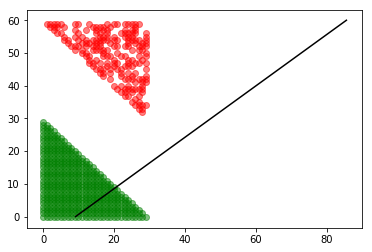

In [29]:
plt.scatter([i for i, j in data[0]], [j for i, j in data[0]], c='r', alpha=0.5)
plt.scatter([i for i, j in data[1]], [j for i, j in data[1]], c='g', alpha=0.5)

w = clf.coef_[0]
a = -w[0] / w[1]

xx = np.linspace(0, CUBE_SIZE*2) # since '-' is not compact but sparse
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(yy,xx, 'k-')
plt.show()

In [31]:
### Part 3

from sklearn import tree
clf_dt = tree.DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
Z = clf_dt.predict(X_test)
print(clf_dt.score(X_test, y_test))

1.0


In [47]:
print(y_test, Z)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1']

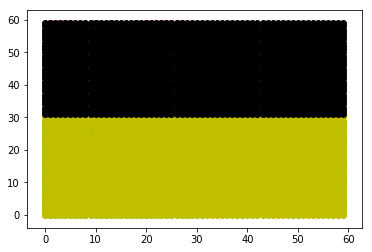

In [35]:
plt.scatter([i for i, j in data[0]], [j for i, j in data[0]], c='r')
plt.scatter([i for i, j in data[1]], [j for i, j in data[1]], c='g', alpha=0.5)

pos =[]
neg=[]

for i in range(int(CUBE_SIZE*2)):
    for j in range(int(CUBE_SIZE*2)):
        l = clf_dt.predict([[i,j]])
        if l[0] == '0':
            neg.append([i, j])
        else:
            pos.append([i, j])

plt.scatter([i for i, _ in pos], [j for _, j in pos], c='y', alpha=1)
plt.scatter([i for i, _ in neg], [j for _, j in neg], c='k', alpha=1)

plt.show()

In [43]:
print(np.array(X_test).shape)
X_test= np.array(X_test)

(200, 2)


In [44]:
X_test[:,0]

array([ 2,  4, 10, 12, 10, 12, 11, 18,  8,  0,  2,  6,  9, 10,  6, 29,  9,
       15, 12, 13,  2,  3, 24,  2, 10,  6, 26,  0, 17,  5, 21, 11,  3,  3,
       24,  5, 16, 17, 15,  7,  2,  8, 22, 24,  8, 17, 27,  1, 17, 15, 18,
        4,  3,  4,  4,  4,  9,  0, 16, 14,  9, 25, 10,  8, 12, 25, 11, 22,
       29, 26, 12,  5, 19,  2, 19, 23,  5, 29, 18, 13, 25, 19,  3, 19,  7,
       13, 12,  2, 19,  2,  5, 15, 29, 15, 18, 11,  2, 17,  0, 13, 28,  2,
       22,  9,  6,  6, 16, 23, 21,  1, 15,  0,  6, 24, 24, 15, 27, 14, 27,
        7, 20, 20, 12, 15, 25,  7, 14, 29,  3,  9, 20, 11,  9,  2,  8, 12,
       27,  1,  5,  7, 21, 20, 11,  6, 19,  6, 13,  0,  4, 29,  9, 10, 14,
        8, 14, 17,  9,  0, 14, 15, 16, 22, 10,  5, 26, 17, 28, 15,  7, 19,
        3, 27, 21, 20, 16, 19,  0, 13,  3,  7, 25,  4,  7, 28,  8,  5,  3,
       25,  0, 11,  3, 17,  6, 21,  7, 18,  3,  4, 22, 11])

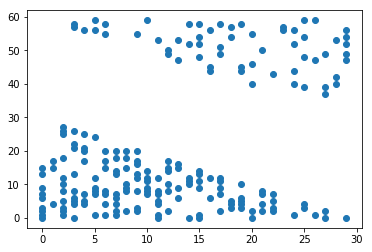

In [50]:

plt.scatter(X_test[:,0], X_test[:,1], label = y_test)

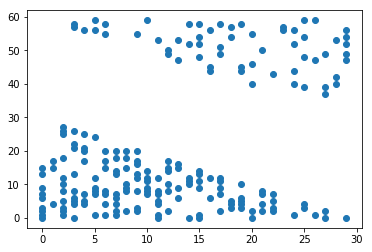

In [49]:

plt.scatter(X_test[:,0], X_test[:,1], label = Z)

In [69]:
print(Z[13]=='0')

True


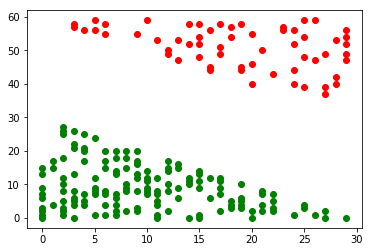

In [75]:
for i in range(len(Z)):
    if(Z[i]=='0'):
        #print(i)
        plt.plot(X_test[i,0], X_test[i,1], 'ro')
    else:
        plt.plot(X_test[i,0], X_test[i,1], 'go')

1.0


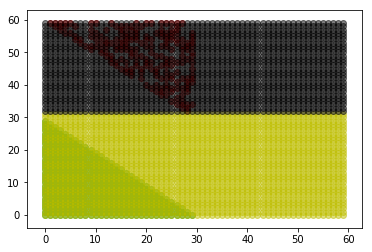

In [13]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf_dt.fit(X_train, y_train)
Z = clf_dt.predict(X_test)
print(clf_dt.score(X_test, y_test))

plt.scatter([i for i, j in data[0]], [j for i, j in data[0]], c='r', alpha=0.5)
plt.scatter([i for i, j in data[1]], [j for i, j in data[1]], c='g', alpha=0.5)

pos =[]
neg=[]

for i in range(int(CUBE_SIZE*2)):
    for j in range(int(CUBE_SIZE*2)):
        l = clf_dt.predict([[i,j]])
        if l[0] == '0':
            neg.append([i, j])
        else:
            pos.append([i, j])

plt.scatter([i for i, _ in pos], [j for _, j in pos], c='y', alpha=0.5)
plt.scatter([i for i, _ in neg], [j for _, j in neg], c='k', alpha=0.5)

plt.show()

In [79]:
X_train= np.array(X_train)

0.9526881720430107
['0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '0' '0' '1' '1' '0' '1' '1' '1'
 '1' '1' '1' '0' '0' '1' '1' '1' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '0' '1' '1' '0' '1' '1' '0' '1' '0' '1' '0' '1' '1'
 '1' '0' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '1' '0' '1' '1'
 '1' '1' '0' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '0' '1' '0' '1' '0'
 '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0'
 '1' '1' '0' '1' '1' '0' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '0' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1' '1' '1' '0' '1'
 '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1'
 '1' '1' '0' '1' '0' '0' '0' '1' '1' '1' '1' '0' '0' '0' '1' '1' '1' '1'
 '1' '0' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '0' '1' '1' '0' '0' '1' '0' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1' '0'
 '1' '1' '1' '1' '1' '0' '1' '1'

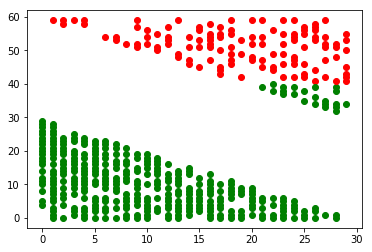

In [84]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=1)
clf_dt.fit(X_test[:20], y_test[:20])
Z = clf_dt.predict(X_train)
print(clf_dt.score(X_train, y_train))
print(Z)
for i in range(len(Z)):
    if(Z[i]=='0'):
        #print(i)
        plt.plot(X_train[i,0], X_train[i,1], 'ro')
    else:
        plt.plot(X_train[i,0], X_train[i,1], 'go')